#### T_amb holen

In [2]:
import pandas as pd

plz = 45257
year = 2024

t_amb_profile = pd.read_csv('C:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis\\T_amb_Essen_1.csv')

# Set DateTime
t_amb_profile['time'] = pd.to_datetime(t_amb_profile['time'])
t_amb_profile.set_index('time', inplace=True)
t_amb_profile

,temp
time,
2024-01-01 00:00:00,8.4
2024-01-01 01:00:00,8.4
2024-01-01 02:00:00,8.1
2024-01-01 03:00:00,5.9
2024-01-01 04:00:00,6.4
...,...
2024-11-21 17:00:00,3.8
2024-11-21 18:00:00,3.6
2024-11-21 19:00:00,3.4


<Axes: xlabel='time'>

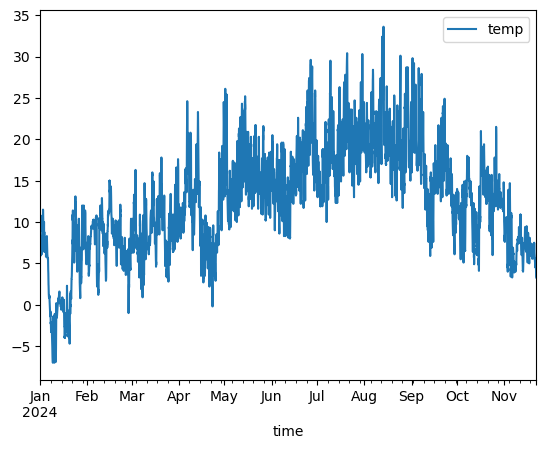

In [3]:
import matplotlib.pyplot as plt
t_amb_profile.plot()

#### WP Daten holen

In [4]:
import glob
import re

# Pfad zu den CSV-Dateien
csv_files = glob.glob(r'C:\Users\DianaEspinosaLozano\anaconda3\envs\thesis\1_Essen\*.csv')

# Funktion zum Extrahieren des Startdatums aus dem Dateinamen (für die Sortierung)
def extract_date(file_name):
    match = re.search(r'(\d{2}-\d{2}-\d{4})', file_name)
    return pd.to_datetime(match.group(1), dayfirst=True) if match else None

# Sortiere die Dateien nach Datum
csv_files_sorted = sorted(csv_files, key=extract_date)

# Leere Liste zum Speichern der DataFrames
df_list = []

# Jede CSV-Datei einlesen und in die Liste hinzufügen
for file in csv_files_sorted:
    try:
        # Lies die Datei ein, überspringe die erste Zeile, und erkenne Komma als Dezimalzeichen
        df = pd.read_csv(file, sep=",", decimal=",", skiprows=1, index_col=None)
        df_list.append(df)
    except Exception as e:
        print(f"Fehler beim Einlesen der Datei {file}: {e}")

# Überprüfen, ob DataFrames erfolgreich geladen wurden
if df_list:
    # Alle DataFrames in der Liste zu einem einzigen DataFrame zusammenführen
    merged_df = pd.concat(df_list, ignore_index=True)
    
    # Den zusammengeführten DataFrame anzeigen oder weiter verwenden
    # print("Zusammengeführter DataFrame:")
    # print(merged_df.head())
    # print("Spaltennamen des zusammengeführten DataFrames:", merged_df.columns)
else:
    print("Es konnten keine DataFrames aus den CSV-Dateien geladen werden.")

# Konvertiere die 'measuredAt'-Spalte in ein datetime-Format
merged_df['measuredAt'] = pd.to_datetime(merged_df['measuredAt'])

# Setze 'measuredAt' als Index, um die Zeitachsen-Daten korrekt zu plotten
merged_df.set_index('measuredAt', inplace=True)
# Remove timezone information from the index
merged_df.index = merged_df.index.tz_localize(None)
merged_df

# Resample in h (sonst 15 Min.)
merged_df_h = merged_df.resample("h").mean()
merged_df_h


,Gesamte Netzeinspeisung (Wh),Gesamter Netzbezug (Wh),PV (Wh),Batterieladung (Wh),Batterieentladung (Wh),Batterie SoC,EV (Wh),Haushalt (Wh),Verbrauch (Wh),Wärmepumpe (Wh)
measuredAt,,,,,,,,,,
2024-03-25 23:00:00,0.0,1165.93000,0.0,0.0,0.00000,0.050000,0.0,133.407667,1165.93000,1032.52200
2024-03-26 00:00:00,0.0,989.55200,0.0,0.0,0.00000,0.050000,0.0,129.379000,989.55200,860.17225
2024-03-26 01:00:00,0.0,846.26700,0.0,0.0,0.00000,0.050000,0.0,133.448250,846.26700,712.81875
2024-03-26 02:00:00,0.0,371.81900,0.0,0.0,0.00000,0.050000,0.0,226.216250,371.81900,145.60250
2024-03-26 03:00:00,0.0,170.78650,0.0,0.0,0.00000,0.041045,0.0,130.611250,170.78650,40.17475
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 18:00:00,0.0,701.29250,0.0,0.0,10.01375,0.107950,0.0,669.256000,711.30675,42.05025
2024-09-30 19:00:00,0.0,291.09825,0.0,0.0,10.00375,0.100000,0.0,255.012750,301.10250,46.08875
2024-09-30 20:00:00,0.0,709.58575,0.0,0.0,9.97625,0.100000,0.0,394.202000,719.56275,325.35975


<Axes: xlabel='measuredAt'>

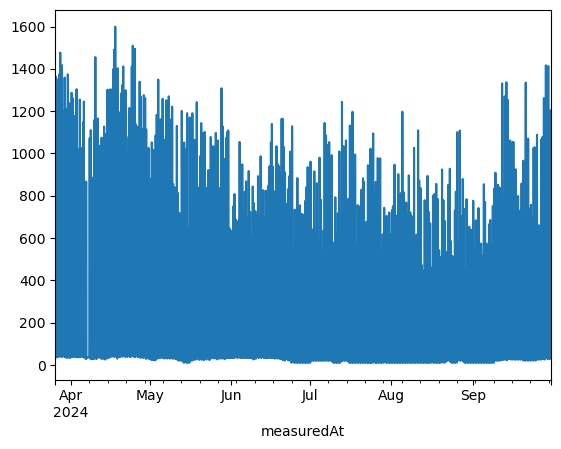

In [5]:
merged_df_h['Wärmepumpe (Wh)'].plot()

#### DataFrame: WP_Leistung & T_amb

In [6]:
t_amb_profile['WP (Wh)'] = merged_df_h['Wärmepumpe (Wh)']
t_amb_profile

,temp,WP (Wh)
time,,
2024-01-01 00:00:00,8.4,NaN
2024-01-01 01:00:00,8.4,NaN
2024-01-01 02:00:00,8.1,NaN
2024-01-01 03:00:00,5.9,NaN
2024-01-01 04:00:00,6.4,NaN
...,...,...
2024-11-21 17:00:00,3.8,NaN
2024-11-21 18:00:00,3.6,NaN
2024-11-21 19:00:00,3.4,NaN


In [7]:
t_amb_profile.to_csv('t_amb_profile_241112.csv', index=True)

#### Plot T_amb vs. WP Leistung

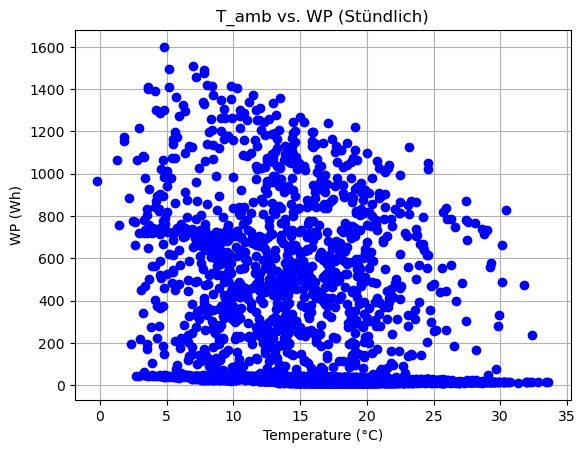

In [8]:
# Stündlich 

import matplotlib.pyplot as plt
# Plotting temperature vs. heat pump power
x = t_amb_profile.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['temp']]
y = t_amb_profile.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['WP (Wh)']]
plt.plot(x, y, marker='o', linestyle='', color='b')

# plt.plot(t_amb_profile['temp'], t_amb_profile['WP (Wh)'], marker='o', linestyle='', color='b')
# t_amb_profile.plot()

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('WP (Wh)')
plt.title('T_amb vs. WP (Stündlich)')
plt.grid(True)
# plt.xlim(-10, 40)
# plt.ylim(0, 2000)
plt.show()


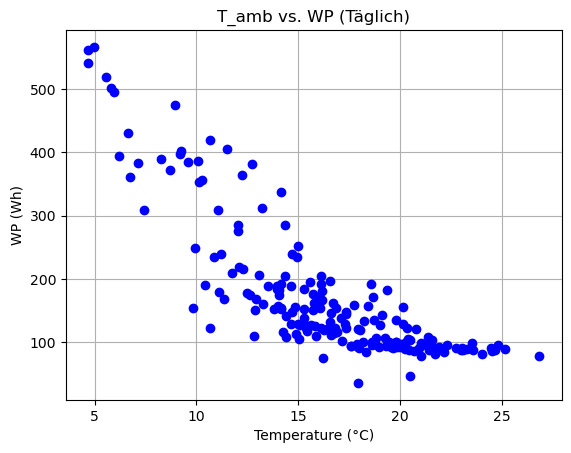

In [9]:
# Täglich
t_amb_profile_daily = t_amb_profile.resample("24h").mean()
x = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['temp']]
y = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['WP (Wh)']]
plt.plot(x, y, marker='o', linestyle='', color='b')

# plt.plot(t_amb_profile_daily['temp'], t_amb_profile_daily['WP (Wh)'], marker='o', linestyle='', color='b')
# t_amb_profile['WP (Wh)'].plot()

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('WP (Wh)')
plt.title('T_amb vs. WP (Täglich)')
plt.grid(True)
# plt.xlim(-10, 40)
# plt.ylim(0, 2000)
plt.show()

#### Gaussian Process Regression

c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again m

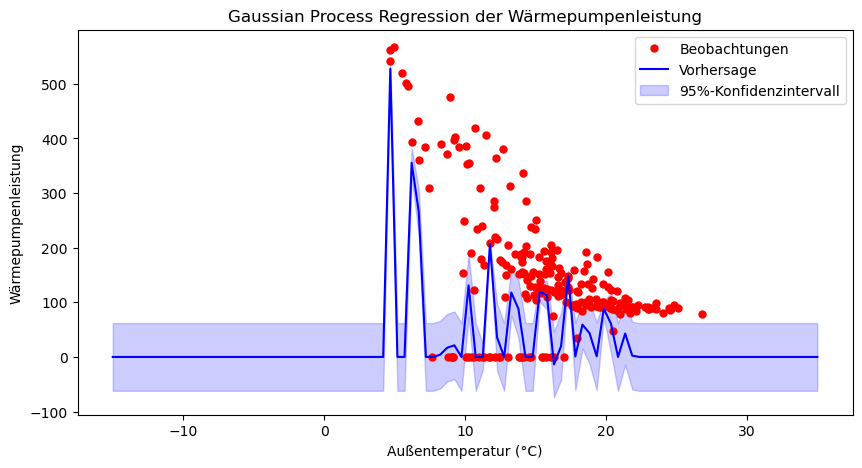

In [10]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# NaN durch 0 ersetzten
t_amb_profile_daily['WP (Wh)'] = pd.to_numeric(t_amb_profile_daily['WP (Wh)'], errors='coerce').fillna(0)

# X und y aus dem DataFrame extrahieren
x = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', 'temp'].values.reshape(-1, 1)
y = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', 'WP (Wh)'].values.ravel()

# Definieren des Kernels: Kombination aus ConstantKernel und RBF-Kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Gaussian Process Regressor initialisieren
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Modell an die Daten anpassen
gp.fit(x, y)

# Vorhersage für den Testbereich (z.B. Temperaturen von -15 bis 35 Grad Celsius)
x_pred = np.linspace(-15, 35, 100).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plotten der Ergebnisse
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r.', markersize=10, label='Beobachtungen')
plt.plot(x_pred, y_pred, 'b-', label='Vorhersage')
plt.fill_between(
    x_pred.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.2,
    color='blue',
    label='95%-Konfidenzintervall'
)
plt.xlabel('Außentemperatur (°C)')
plt.ylabel('Wärmepumpenleistung')
plt.title('Gaussian Process Regression der Wärmepumpenleistung')
plt.legend()
plt.show()

In [11]:
t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-04-15 23:00:00']

,temp,WP (Wh)
time,,
2024-03-26,9.266667,403.032490
2024-03-27,8.925000,475.114271
2024-03-28,8.262500,388.968927
2024-03-29,10.683333,419.449917
2024-03-30,11.508333,406.236833
2024-03-31,12.216667,364.365917
2024-04-01,10.058333,385.767396
2024-04-02,9.600000,385.160594
2024-04-03,10.266667,355.794979


#### Summe pro Tag des WP-Verbrauchs

In [12]:
t_amb_profile_daily['WP_sum'] = t_amb_profile['WP (Wh)'].resample('24h').sum()
t_amb_profile_daily['WP_sum']

time
2024-01-01    0.0
2024-01-02    0.0
2024-01-03    0.0
2024-01-04    0.0
2024-01-05    0.0
             ... 
2024-11-17    0.0
2024-11-18    0.0
2024-11-19    0.0
2024-11-20    0.0
2024-11-21    0.0
Freq: 24h, Name: WP_sum, Length: 326, dtype: float64

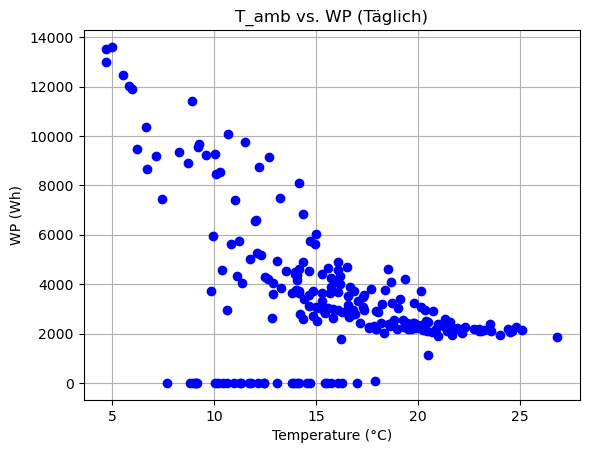

In [13]:
x = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['temp']]
y = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['WP_sum']]
plt.plot(x, y, marker='o', linestyle='', color='b')


# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('WP (Wh)')
plt.title('T_amb vs. WP (Täglich)')
plt.grid(True)
plt.show()

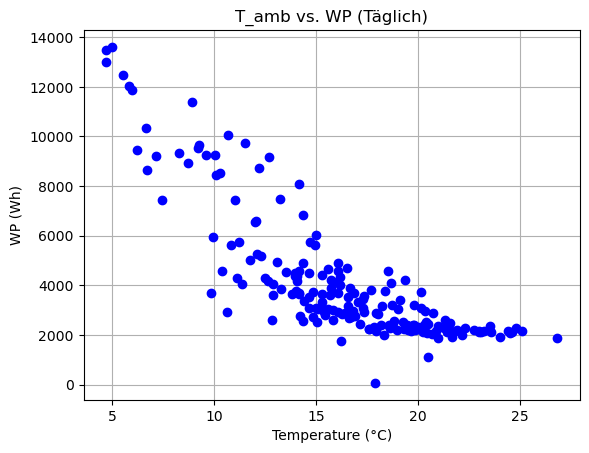

In [14]:
# Filtern des DataFrames, um nur Zeilen mit WP_sum > 0 beizubehalten
t_amb_profile_daily = t_amb_profile_daily[t_amb_profile_daily['WP_sum'] != 0]

x = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['temp']]
y = t_amb_profile_daily.loc['2024-03-26 00:00:00':'2024-10-31 23:00:00', ['WP_sum']]
plt.plot(x, y, marker='o', linestyle='', color='b')


# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('WP (Wh)')
plt.title('T_amb vs. WP (Täglich)')
plt.grid(True)
plt.show()

In [15]:
t_amb_profile_daily

,temp,WP (Wh),WP_sum
time,,,
2024-03-25,6.745833,1032.522000,1032.52200
2024-03-26,9.266667,403.032490,9672.77975
2024-03-27,8.925000,475.114271,11402.74250
2024-03-28,8.262500,388.968927,9335.25425
2024-03-29,10.683333,419.449917,10066.79800
...,...,...,...
2024-09-26,15.075000,126.817719,3043.62525
2024-09-27,12.883333,150.203344,3604.88025
2024-09-28,10.108333,352.682281,8464.37475


#### Exponentielle Regression

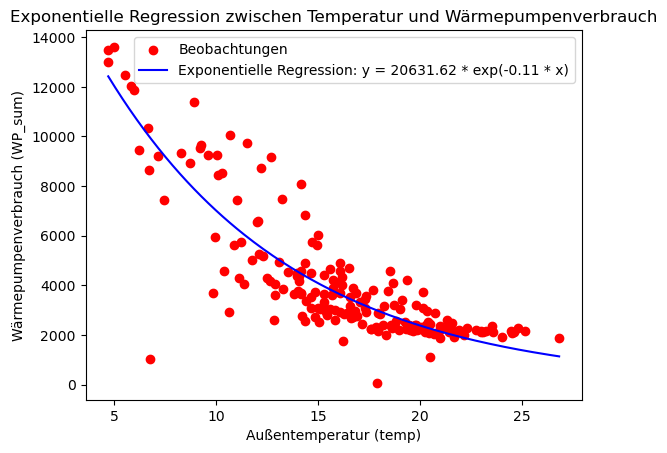

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten extrahieren
x = t_amb_profile_daily['temp'].values
y = t_amb_profile_daily['WP_sum'].values

# Definieren der exponentiellen Funktion
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Anpassung des Modells an die Daten
params, covariance = curve_fit(exponential_model, x, y, p0=(1, 0.1))

# Extrahieren der Parameter a und b
a, b = params

# Vorhersage basierend auf dem Modell
x_pred = np.linspace(min(x), max(x), 190)
y_pred = exponential_model(x_pred, a, b)

# Plotten der Originaldaten und der exponentiellen Anpassung

plt.scatter(x, y, color='red', label='Beobachtungen')
plt.plot(x_pred, y_pred, color='blue', label=f'Exponentielle Regression: y = {a:.2f} * exp({b:.2f} * x)')
plt.xlabel('Außentemperatur (temp)')
plt.ylabel('Wärmepumpenverbrauch (WP_sum)')
plt.title('Exponentielle Regression zwischen Temperatur und Wärmepumpenverbrauch')
plt.legend()
plt.show()


In [17]:
# R²-Wert berechnen
ss_res = np.sum((y - y_pred) ** 2)          # Summe der quadratischen Residuen
ss_tot = np.sum((y - np.mean(y)) ** 2)      # Totale Summe der Quadrate
r_squared = 1 - (ss_res / ss_tot)           # R²-Berechnung

print(f"R²-Wert: {r_squared:.4f}")


R²-Wert: 0.0955


#### Residualanalyse

In [18]:
# 1. Residuendifferenz
# Tatsächliche Werte und vorhergesagte Werte
y_actual = t_amb_profile_daily['WP_sum'].values
y_pred = exponential_model(x, a, b)  # Basierend auf dem vorher angepassten Modell

# Berechnung der Residuen
residuals = y_actual - y_pred

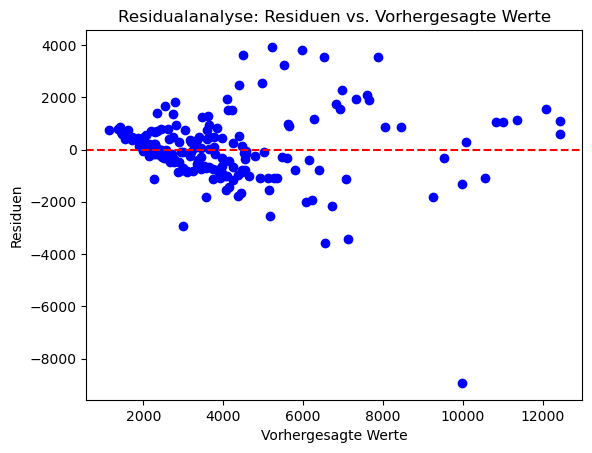

In [19]:
# 2. Residuen-Plot (Residuals vs. Vorhergesagte Werte)

plt.scatter(y_pred, residuals, color="blue")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.title("Residualanalyse: Residuen vs. Vorhergesagte Werte")
plt.show()

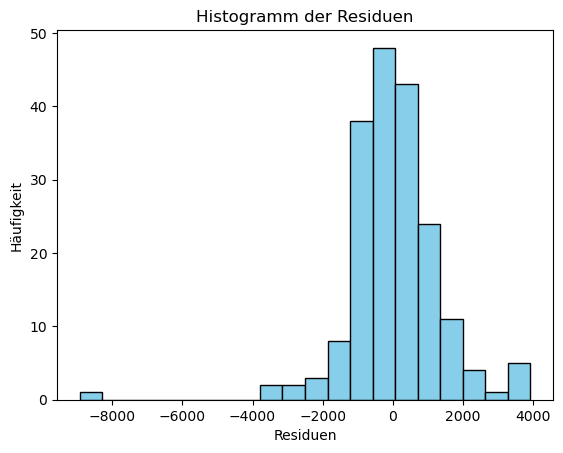

In [20]:
# 3. Histogramm der Residuen

plt.hist(residuals, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Residuen")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Residuen")
plt.show()

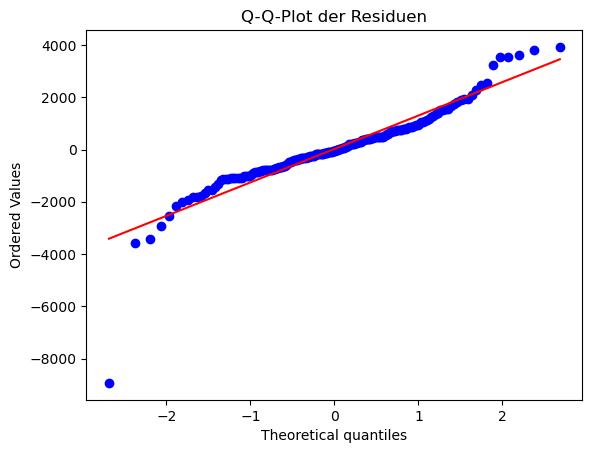

In [21]:
# 4. Q-Q-Plot (Quantile-Quantile-Plot)
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q-Plot der Residuen")
plt.show()

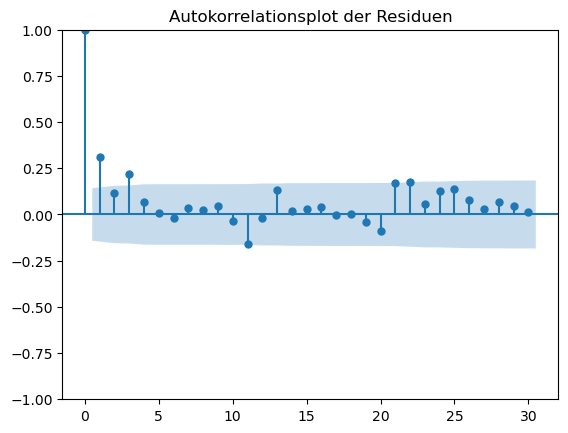

In [22]:
# 5. Autokorrelationsplot der Residuen (falls zeitliche Daten vorliegen)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=30)
plt.title("Autokorrelationsplot der Residuen")
plt.show()

Interpretation der Ergebnisse
- Residuen-Plot: Ein zufälliges Muster um die Null ohne Trends deutet auf ein gutes Modell hin. Wenn Muster wie ein Trend oder eine zunehmende Streuung auftreten, deutet dies auf ein Problem im Modell hin.
- Histogramm: Sollte annähernd eine Normalverteilung zeigen. Schiefe oder ungewöhnliche Formen können auf ein nicht geeignetes Modell oder fehlerhafte Annahmen hindeuten.
- Q-Q-Plot: Punkte sollten in einer geraden Linie liegen, was auf Normalität hindeutet. Abweichungen deuten auf eine Nicht-Normalität der Residuen hin.
- Autokorrelationsplot: Zeigt, ob die Residuen voneinander abhängig sind. Hohe Autokorrelationswerte deuten auf Abhängigkeiten hin und darauf, dass das Modell möglicherweise systematische Muster nicht erklärt.

#### Datei um WP Profil zu erstellen (T_amb abhängig)

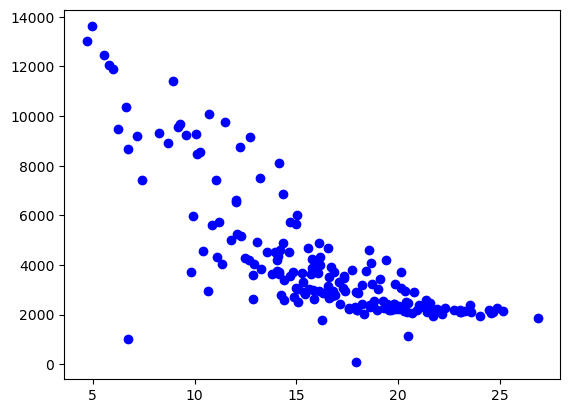

In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Exponentielles Modell definieren
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Modellparameter schätzen
x = t_amb_profile_daily['temp'].values
y = t_amb_profile_daily['WP_sum'].values
params, _ = curve_fit(exponential_model, x, y, p0=(1, 0.1))
a, b = params

# Vorhergesagte Exponentialkurve berechnen
t_amb_profile_daily['exp_curve'] = exponential_model(x, a, b)

# Berechnung der Abstände zur Exponentialkurve
t_amb_profile_daily['distance'] = np.abs(t_amb_profile_daily['WP_sum'] - t_amb_profile_daily['exp_curve'])

# Sortierung nach Abstand zur Exponentialkurve und Entfernung duplizierter 'temp'-Werte
t_amb_closest_points = t_amb_profile_daily.sort_values('distance').drop_duplicates('temp').head(190)

# Auswahl relevanter Spalten für die CSV-Datei
t_amb_closest_points = t_amb_closest_points[['temp', 'WP_sum']]


plt.plot(t_amb_closest_points['temp'], t_amb_closest_points['WP_sum'], marker='o', linestyle='', color='b')


# Exportieren als CSV-Datei
#t_amb_closest_points.to_csv('closest_points_to_exponential_curve.csv', index=False)


<Axes: xlabel='time'>

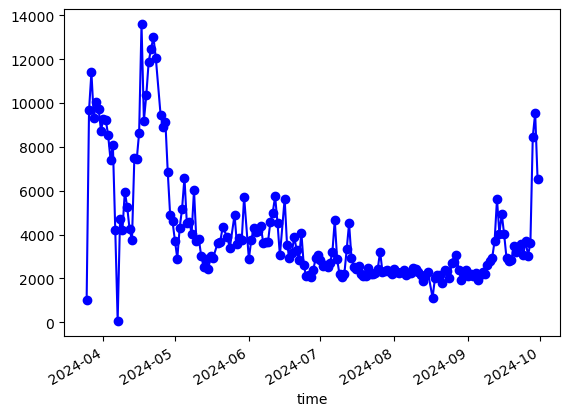

In [27]:
t_amb_closest_points = t_amb_closest_points.sort_index()
t_amb_closest_points['WP_sum'].plot(marker='o', linestyle='-', color='b')

In [28]:
t_amb_closest_points.to_csv('Muester_Tamb_Essen_1.csv', index=True)